# Open Pandas Session 

> Author: Vincent D. Warmerdam (koaning)

> Blog/Data/Code: [koaning blog](http://koaning.io)

This is a document that was originally intended for students of my open Pandas sessions in Amsterdam. Example [here](http://www.eventbrite.co.uk/e/pandas-python-session-tickets-15630063942). However, other have found this useful which is why I don't mind people sharing it. 

## Contents of the Notebook

- ipython basics 
- reminder of python lists
- introduction to numpy 
- quick plots with matplotlib
- introduction to pandas 

## Loading Packages 

Before moving on. Make sure that the following packages can be loaded without difficulty. 

In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

Should this give a problem, you can use pip from your ipython notebook and install any python package you might want. 

In [3]:
import pip

def install(package):
   pip.main(['install', package])

install('requests') 

Cleaning up...


### Notebook Shortcuts 

A list of some useful ones:

- `ctrl + enter` : run cell
- `shift + enter` : run cell and create/select the one after
- `ctrl + m` : enter command mode 
- `ctrl + s` :save notebook 

While in command mode the shortcuts work a bit different: 

- up/down arrows browser through different cells 
- `y` : changes cell to a code cell 
- `m` : changes cell to a markdown cell
- `a` : create new cell above 
- `b` : create new cell below 
- `l` : toggle line numbers 
- `dd` : delete cell 

You can always access the docs/help by added the `?` in front of any function in python. You can escape this helper view by pressing `q`.

In [4]:
?np.abs

## Reminder of Python 


In [5]:
for i in [1,2,3,2,1]:
    print(i)

1
2
3
2
1


In [6]:
for i,j in enumerate([1,2,3,2,1]):
    print(i,j)

(0, 1)
(1, 2)
(2, 3)
(3, 2)
(4, 1)


In [7]:
def double(x):
    return(x*2)

for i in [1,2,3,2,1]:
    print(double(i))

2
4
6
4
2


In [8]:
[double(i) for i in [1,2,3,2,1]]

[2, 4, 6, 4, 2]

In [9]:
[double(i) for i in [1,2,3,2,1] if i % 2 == 0]

[4, 4]

In [10]:
[(i, double(j)) for (i,j) in enumerate([1,2,3,2,1])]

[(0, 2), (1, 4), (2, 6), (3, 4), (4, 2)]

In [11]:
for i in map(double, [1,2,3,2,1]):
    print(i)

2
4
6
4
2


In [12]:
for i in map(lambda x: x*2, [1,2,3,2,1]):
    print(i)

2
4
6
4
2


## Key Lessons 

- list comprehensions are shorter and often simpler
- it's ok to use forloops if you need them, but sometimes its better not to
- map/apply type functions seperate concerns 
- there are usually multiple ways to do something
- pick the obvious way of doing something but think about it

## Lists and performance 

A downside of python is that because it is a dynamically typed language (no compiler, no types) we loose some performance. The numpy library is meant to counter this by giving us an API with python objects that call highly performant C-code so that we can still write python code for performant numerical problems. 

Let's check out the performance. We can use the `%%timeit` notebook magic. 

In [13]:
%%timeit 
sum(range(0,100000))

1000 loops, best of 3: 1.31 ms per loop


In [14]:
%%timeit 
sum([i for i in range(0,100000)])

100 loops, best of 3: 4.38 ms per loop


In [15]:
%%timeit
np.sum(np.arange(0,100000))

10000 loops, best of 3: 89.3 µs per loop


In [16]:
%%timeit
np.sum([i for i in range(0,100000)])

100 loops, best of 3: 12.9 ms per loop


In [17]:
%%timeit
sum(np.arange(0,100000))

10 loops, best of 3: 35.6 ms per loop


In [18]:
%%timeit 
s = 0 
for i in range(0,100000):
    s = s + 1

100 loops, best of 3: 4.6 ms per loop


Keep all your functions restricted to numpy if you want performant code. The moment you mix python number lists with numpy arrays the code seems to drastically loose performance. Using the standard python sum function on a numpy array is the worst case! 

Similar conclusions can be made when dealing with vectorized operations.

In [19]:
%%timeit 
[2*i for i in range(0,100000)]

100 loops, best of 3: 6.69 ms per loop


In [20]:
%%timeit
np.arange(0,100000) * 2

10000 loops, best of 3: 105 µs per loop


In [21]:
%%timeit 
[math.sqrt(i) for i in range(0,100000)]

100 loops, best of 3: 11.7 ms per loop


In [22]:
%%timeit 
np.sqrt(np.arange(0,100000))

1000 loops, best of 3: 343 µs per loop


The reason behind the performance cost has to do with type-checking/casting that needs to be done at runtime instead of compile time. Numpy will run precompiled BLAS/C-code, any combination with normal python code will therefor add overhead. This overhead may not be dreadful, but it is a thing to look for when code needs to get faster.

Numpy arrays are different from python lists. You can easily cast between the two, but you should notice they will behave differently around operators. 

In [23]:
py_arr = [1,2,3,2,1]
np_arr = np.array(py_arr)
print(py_arr)
print(np_arr)

[1, 2, 3, 2, 1]
[1 2 3 2 1]


In [24]:
py_arr * 2

[1, 2, 3, 2, 1, 1, 2, 3, 2, 1]

In [25]:
np_arr * 2

array([2, 4, 6, 4, 2])

In [49]:
py_arr + py_arr * 2

[1, 2, 3, 2, 1, 1, 2, 3, 2, 1, 1, 2, 3, 2, 1]

In [51]:
np_arr + np_arr

array([2, 4, 6, 4, 2])

If you want to know what type the numpy array contains, you may use: 

In [26]:
print(np_arr.dtype)
print(np_arr.shape)

int64
(5,)


You can also change the contents of the array and numpy will update the datatype.

In [27]:
np.array([1.0, 2.5]).dtype

dtype('float64')

In [28]:
np.array(['as dwarves we want','more','profit']).dtype

dtype('S18')

There are [many](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dtype.html) datatypes out there. For today, we will only focus on numerical `float64` arrays and matrices. 

You can declare arrays very easily in numpy. Here are some common initialization functions.

In [29]:
np.zeros([3,3])

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [30]:
np.ones(3)

array([ 1.,  1.,  1.])

In [31]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [32]:
np.arange(1,10,0.5)

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [33]:
np.linspace(1,10, 20)

array([  1.        ,   1.47368421,   1.94736842,   2.42105263,
         2.89473684,   3.36842105,   3.84210526,   4.31578947,
         4.78947368,   5.26315789,   5.73684211,   6.21052632,
         6.68421053,   7.15789474,   7.63157895,   8.10526316,
         8.57894737,   9.05263158,   9.52631579,  10.        ])

In [34]:
np.logspace(1, 7, num=7, base=10)

array([  1.00000000e+01,   1.00000000e+02,   1.00000000e+03,
         1.00000000e+04,   1.00000000e+05,   1.00000000e+06,
         1.00000000e+07])

In [35]:
np.arange(15).reshape([3,5])

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

As stated before, we can do vectorized operations on these arrays as if we are doing true mathematical operators on them. If you remember your linear algebra from college, the following might feel more familiar.

In [36]:
np_nums = np.array([1.2, 3.5, 5.2])
np_nums + 1

array([ 2.2,  4.5,  6.2])

In [37]:
np_nums - np_nums

array([ 0.,  0.,  0.])

In [38]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [39]:
np_nums * np.eye(3)

array([[ 1.2,  0. ,  0. ],
       [ 0. ,  3.5,  0. ],
       [ 0. ,  0. ,  5.2]])

You can also slice/dice/select numbers easily.

In [40]:
arr = np.array([9,4,3,5,2,1,5,3])
arr[1]

4

In [41]:
arr[1:5]

array([4, 3, 5, 2])

In [42]:
arr[1:5] = 3 
arr 

array([9, 3, 3, 3, 3, 1, 5, 3])

In [43]:
arr == 3

array([False,  True,  True,  True,  True, False, False,  True], dtype=bool)

In [44]:
arr[arr != 3]

array([9, 1, 5])

In [45]:
ran = np.random.normal(0,1,[4,4])
ran

array([[-1.36950603,  1.43554151, -1.14432941, -0.20742087],
       [-0.43689389,  0.66257023, -0.26525248,  0.50035787],
       [ 0.37109136, -1.87358786,  1.1844844 , -0.41269869],
       [-0.30787984,  0.48506586,  0.58243346,  0.93661386]])

In [46]:
ran[ran < 0] = 0 
ran

array([[ 0.        ,  1.43554151,  0.        ,  0.        ],
       [ 0.        ,  0.66257023,  0.        ,  0.50035787],
       [ 0.37109136,  0.        ,  1.1844844 ,  0.        ],
       [ 0.        ,  0.48506586,  0.58243346,  0.93661386]])

## Plotting with numpy

I found another nice riddle. 

> When there's a wind blowing, quite a strong one. It is blowing in the same direction as the flightpath between two cities. Does a round-trip by plane take more time, less time, or the same time when there is a strong wind? 

Let's go and use full on math for this one. Denote $v$ the speed of the airplane and let $w$ be the effect on the speed caused by the wind. Then the time to get from A to B and the time to get from B to A is defined via: 

\begin{align} 
t_{AB}& = \frac{d}{v+w}\\ 
t_{BA}& = \frac{d}{v-w} 
\end{align}

The direction of the wind is not that important as long as the wind remains in the same direction. Notice then that the total time needed make a round trip becomes: 

\begin{align} 
T  = t_{AB} + t_{BA}& = \frac{d}{v+w} + \frac{d}{v-w}\\ 
& = d \frac{(v-w)+(v+w)}{(v+w)(v-w)}\\
& = 2d \frac{v}{v^2-w^2}\\
T(w)& = 2d \frac{v}{v^2-w^2}
\end{align}

Let's go and plot this. 

In [47]:
w = np.arange(-99, 99, 0.1)
v = 100 
d = 1200
t = 2 * d * v / (v**2 - w**2)

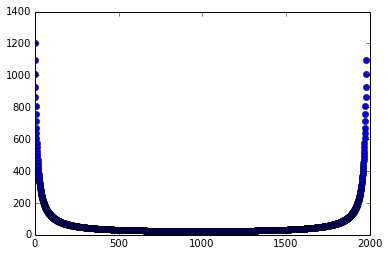

In [54]:
plt.plot(t, 'o')

When $v$ starts to resemble $w$ the traveling time goes to infinity, which makes sense. 

The main point though, is that our single line of code that is calculating all this is very elegant: 

    t = 2 * d * v / (v**2 - w**2)
    
If you are used to working with maths the vectorized operations aren't just very performant, they are also very elegant in writing.It is also nice that we have a simple method for plotting simple charts. In general, people like looking at charts much more than they like looking at formulas. 

## Simulation 

Numpy has great support for random number generation. Here's a few results from random generated sequences. 

#### Uniform Distribution

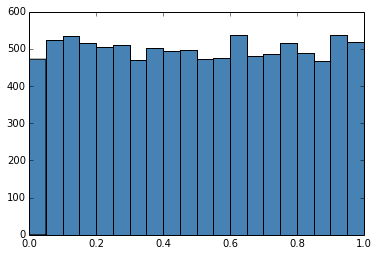

In [55]:
rns = np.random.uniform(0,1,10000)
_ = plt.hist(rns, color="steelblue", bins=20)

####Normal Distribution

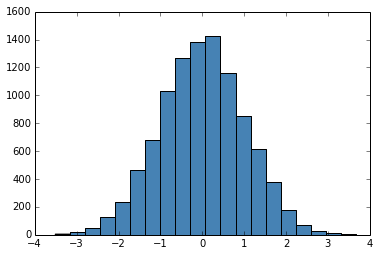

In [57]:
rns = np.random.normal(0,1,10000)
_ = plt.hist(rns, color="steelblue", bins=20)

####Random Integer Distribution

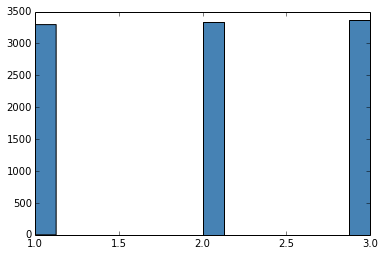

In [58]:
rns = np.random.randint(1,4,10000)
_ = plt.hist(rns, color="steelblue", bins=16)

####Binomial Distribution

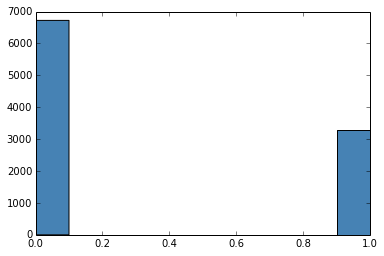

In [59]:
rns = np.random.binomial(1,0.33,10000)
_ = plt.hist(rns, color="steelblue", bins=10)

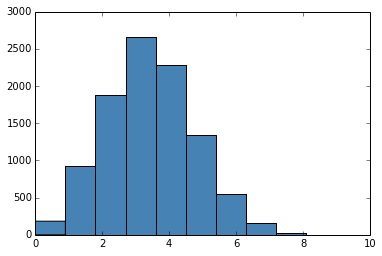

In [60]:
rns = np.random.binomial(10,0.33,10000)
_ = plt.hist(rns, color="steelblue", bins=10)

### Assignments Till Break / Before Pandas

Here is a small list of some assignments. You may want to consult the numpy documentation to see if there are helper functions that can make your life a lot easier. 

1. Create 1000 random uniform numbers and find out what the largest number is. 
2. Estimate the probability that a random normal value lies between 0.1 and 0.5.
3. Calculate the mean of 1000 random values. Is this what you expected? 
4. Use simulation to estimate the probability that two people in this room have the same birthday. 

### Solution to last problem 

In [6]:
def sim_same_birthday(num_people):
    # return True if a birthday overlaps, False otherwise
    r = np.random.randint(1, 366, num_people)
    return np.unique(r).shape[0] < num_people

def estimate_prob(num_people, n_sim=10000):
    simulations = [sim_same_birthday(num_people) for i in range(n_sim)]
    return sum(simulations)/float(n_sim)

In [7]:
estimate_prob(27)

0.6263

We will now vary the number of people in the room, how will the probability change?

In [119]:
res = np.array([])
num_people = 30 

for num_people in range(0,100):
    res = np.append(res, estimate_prob(num_people))

We now have the simulated results for any number of people in the group. Let's also calculate the theoretical probability and compare it to our simulated results.

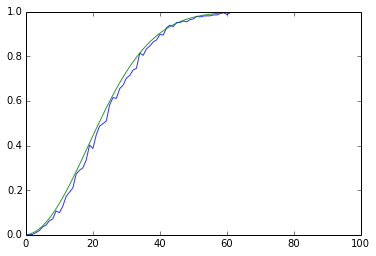

In [130]:
theoretical = 1 - np.cumprod((1 - np.arange(0,100)/365.0))
plt.plot(np.array([res, theoretical]).T, alpha=0.8)

For larger values of `n_sim` we expect to be closer to the true value, but we can see that simulation can have it's value if the problem is hard to mathematically derive. Play around with `n_sim` if you want to see the effect of sample sizes. 

# BREAK 

## Pandas

Numpy is very performant and useful but it doesn't resemble a sheet of data with rows and columns as much as we'd like. It's more like an array or a matrix. This is fine for the more sciency applications but it is less ideal for the applications where we are analysing a datasheet that you've been handed. 

Back in the day before code, this meant that you needed to use your mouse and click away in excel. 

![](http://www.quickmeme.com/img/35/3521d93d07b8a623d83663e3ad79407b5cebeaedc55f21d0be591290330f656c.jpg)

Thankfully, we have pandas and python nowadays. The syntax of pandas is mostly similar to numpy, so let's get familiar with it.

In [55]:
a = np.random.randn(10)
pd.Series(a)

0   -0.139232
1    1.853622
2   -0.502512
3   -0.927622
4   -1.012169
5    1.951794
6    0.815848
7   -0.261483
8   -2.494320
9   -0.148075
dtype: float64

Notice that this is just like our numpy array but that we get an index attached. In this case the index is numeric, but it could even be a date or a string. As long as it is sortable and unique for each row, it can probably be used as an index.

In [56]:
a = np.random.randn(10)
b = np.random.randn(10)
c = [ 'foo' if x > 0.5 else 'bar' for x in np.random.rand(10)]
d = {'a':a, 'b':b, 'c':c} 
d

{'b': array([-1.7906526 , -1.34761142,  1.38842115, -0.62252441,  1.55530802,
         1.12046039, -0.00401563, -0.05004921,  0.43479804,  0.52035275]),
 'a': array([-1.41107143, -1.58859416, -1.88519431, -1.38349794, -0.29303002,
         1.32640887,  1.41969707, -0.80874054, -0.47603369, -0.98340024]),
 'c': ['bar', 'foo', 'foo', 'bar', 'foo', 'foo', 'foo', 'foo', 'foo', 'foo']}

We have just created a dictionary. Pandas can convert these into series via the `DataFrame` function. A dataframe can be seen as a table where each of the series represent columns. The index of the series represents the rownumber. 

This DataFrame object will be the main object you will talk to when using pandas.

In [57]:
df = pd.DataFrame(d) 
df

,a,b,c
0,-1.411071,-1.790653,bar
1,-1.588594,-1.347611,foo
2,-1.885194,1.388421,foo
3,-1.383498,-0.622524,bar
4,-0.293030,1.555308,foo
5,1.326409,1.120460,foo
6,1.419697,-0.004016,foo
7,-0.808741,-0.050049,foo
8,-0.476034,0.434798,foo
9,-0.983400,0.520353,foo


### Some simple queries you could make to a DataFrame 

In [58]:
df['a']

0   -1.411071
1   -1.588594
2   -1.885194
3   -1.383498
4   -0.293030
5    1.326409
6    1.419697
7   -0.808741
8   -0.476034
9   -0.983400
Name: a, dtype: float64

In [59]:
df['a'] < 0

0     True
1     True
2     True
3     True
4     True
5    False
6    False
7     True
8     True
9     True
Name: a, dtype: bool

In [60]:
df['e'] = 1 + df.a
df

,a,b,c,e
0,-1.411071,-1.790653,bar,-0.411071
1,-1.588594,-1.347611,foo,-0.588594
2,-1.885194,1.388421,foo,-0.885194
3,-1.383498,-0.622524,bar,-0.383498
4,-0.293030,1.555308,foo,0.706970
5,1.326409,1.120460,foo,2.326409
6,1.419697,-0.004016,foo,2.419697
7,-0.808741,-0.050049,foo,0.191259
8,-0.476034,0.434798,foo,0.523966
9,-0.983400,0.520353,foo,0.016600


In [61]:
df[df.a < 0]

,a,b,c,e
0,-1.411071,-1.790653,bar,-0.411071
1,-1.588594,-1.347611,foo,-0.588594
2,-1.885194,1.388421,foo,-0.885194
3,-1.383498,-0.622524,bar,-0.383498
4,-0.293030,1.555308,foo,0.706970
7,-0.808741,-0.050049,foo,0.191259
8,-0.476034,0.434798,foo,0.523966
9,-0.983400,0.520353,foo,0.016600


In [62]:
df[ (df.a < 0) & (df.b < 0) ] 

,a,b,c,e
0,-1.411071,-1.790653,bar,-0.411071
1,-1.588594,-1.347611,foo,-0.588594
3,-1.383498,-0.622524,bar,-0.383498
7,-0.808741,-0.050049,foo,0.191259


In [63]:
df[ (df.a < 0) & (df.b < 0) ].c

0    bar
1    foo
3    bar
7    foo
Name: c, dtype: object

In [64]:
df.head(1)

,a,b,c,e
0,-1.411071,-1.790653,bar,-0.411071


In [65]:
df.tail(1)

,a,b,c,e
9,-0.9834,0.520353,foo,0.0166


In [66]:
df.shape

(10, 4)

In [67]:
df.describe()

,a,b,e
count,10.000000,10.000000,10.000000
mean,-0.608346,0.120449,0.391654
std,1.154241,1.121973,1.154241
min,-1.885194,-1.790653,-0.885194
25%,-1.404178,-0.479406,-0.404178
50%,-0.896070,0.215391,0.103930
75%,-0.338781,0.970433,0.661219
max,1.419697,1.555308,2.419697


In [68]:
df.mean(axis=0)

a   -0.608346
b    0.120449
e    0.391654
dtype: float64

In [69]:
df.mean(axis=1)

0   -1.204265
1   -1.174933
2   -0.460656
3   -0.796507
4    0.656416
5    1.591093
6    1.278460
7   -0.222510
8    0.160910
9   -0.148816
dtype: float64

# Split-Apply-Combine 

A moment of abstraction. 

Very often we will want to perform group operations on data. In the financial example we saw that we wanted to perform operations for every week or for every month. In another example we might want to apply methods per geolocation/type of person/per website... etc 

Whenever we are doing such an operation, we might look at it as a ```split-apply-combine``` operation, shown visually below:

<img src="https://camo.githubusercontent.com/60a1e7e95eaef8f9a99f43335368915eafedda3e/687474703a2f2f7777772e686f66726f652e6e65742f737461743537392f736c696465732f73706c69742d6170706c792d636f6d62696e652e706e67" width = "100%">

Pandas has great support for these kinds of operations. Based on the key of a dataframe we will split the data and then apply functions to the grouped data. 

# Enter ChickWeight 

For this next bit we will use the chickweight dataset. This dataset contains information about different diets for chickens. The goal of the dataset is to find out which diet will get the chickens as fat as possible. 

In [29]:
chickdf = pd.read_csv('http://koaning.s3-website-us-west-2.amazonaws.com/data/pydata/chickweight.csv')
chickdf.describe()

,rownum,weight,Time,Chick,Diet
count,578.000000,578.000000,578.000000,578.000000,578.000000
mean,289.500000,121.818339,10.717993,25.750865,2.235294
std,166.998503,71.071960,6.758400,14.568795,1.162678
min,1.000000,35.000000,0.000000,1.000000,1.000000
25%,145.250000,63.000000,4.000000,13.000000,1.000000
50%,289.500000,103.000000,10.000000,26.000000,2.000000
75%,433.750000,163.750000,16.000000,38.000000,3.000000
max,578.000000,373.000000,21.000000,50.000000,4.000000


In [30]:
grouped = chickdf.groupby(["Diet"])

for thing in grouped:
    print(thing)

(1,      rownum  weight  Time  Chick  Diet
0         1      42     0      1     1
1         2      51     2      1     1
2         3      59     4      1     1
3         4      64     6      1     1
4         5      76     8      1     1
5         6      93    10      1     1
6         7     106    12      1     1
7         8     125    14      1     1
8         9     149    16      1     1
9        10     171    18      1     1
10       11     199    20      1     1
11       12     205    21      1     1
12       13      40     0      2     1
13       14      49     2      2     1
14       15      58     4      2     1
15       16      72     6      2     1
16       17      84     8      2     1
17       18     103    10      2     1
18       19     122    12      2     1
19       20     138    14      2     1
20       21     162    16      2     1
21       22     187    18      2     1
22       23     209    20      2     1
23       24     215    21      2     1
24       25      43  

In [31]:
grouped.describe()

Chick        Time      rownum      weight
Diet                                                      
1    count  220.000000  220.000000  220.000000  220.000000
     mean     9.963636   10.481818  110.500000  102.645455
     std      5.700160    6.754984   63.652704   56.656553
     min      1.000000    0.000000    1.000000   35.000000
     25%      5.000000    4.000000   55.750000   57.750000
     50%     10.000000   10.000000  110.500000   88.000000
     75%     14.000000   16.000000  165.250000  136.500000
     max     20.000000   21.000000  220.000000  305.000000
2    count  120.000000  120.000000  120.000000  120.000000
     mean    25.500000   10.916667  280.500000  122.616667
     std      2.884324    6.804081   34.785054   71.607495
     min     21.000000    0.000000  221.000000   39.000000
     25%     23.000000    5.500000  250.750000   65.500000
     50%     25.500000   11.000000  280.500000  104.500000
     75%     28.000000   16.500000  310.250000  163.000000
     max     30.000000   21.000000  340.000000  331.000000
3    count  120.000000  120.000000  120.000000  120.000000
     mean    35.500000   10.916667  400.500000  142.950000
     std      2.884324    6.804081   34.785054   86.541761
     min     31.000000    0.000000  341.000000   39.000000
     25%     33.000000    5.500000  370.750000   67.500000
     50%     35.500000   11.000000  400.500000  125.500000
     75%     38.000000   16.500000  430.250000  198.750000
     max     40.000000   21.000000  460.000000  373.000000
4    count  118.000000  118.000000  118.000000  118.000000
     mean    45.525424   10.754237  519.500000  135.262712
     std      2.902141    6.744338   34.207699   68.828714
     min     41.000000    0.000000  461.000000   39.000000
     25%     43.000000    4.500000  490.250000   71.250000
     50%     46.000000   10.000000  519.500000  129.500000
     75%     48.000000   16.000000  548.750000  184.750000
     max     50.000000   21.000000  578.000000  322.000000

### Applying your own
We can use built in functions on our grouped objects, but we can also just apply our own functions. 

Note that these functions need to be able to be applied to a DataFrame object, as long as the function does this, it will work.

In [32]:
def show_size(x):
    return "Dude we have " + str(len(x)) + " chickens here!" 

grouped.apply(show_size)

Diet
1       Dude we have 220 chickens here!
2       Dude we have 120 chickens here!
3       Dude we have 120 chickens here!
4       Dude we have 118 chickens here!
dtype: object

Realize that this means that **any** function can be used here. You will want to think about performance when dealing with large datasets. This functionality is one of the things that make the pandas API very powerful. 

### Advanced Groups 
We can also created groups based on two columns in the table. 

In [33]:
chickdf.groupby(['Time']).weight.apply(show_size)

Time
0       Dude we have 50 chickens here!
2       Dude we have 50 chickens here!
4       Dude we have 49 chickens here!
6       Dude we have 49 chickens here!
8       Dude we have 49 chickens here!
10      Dude we have 49 chickens here!
12      Dude we have 49 chickens here!
14      Dude we have 48 chickens here!
16      Dude we have 47 chickens here!
18      Dude we have 47 chickens here!
20      Dude we have 46 chickens here!
21      Dude we have 45 chickens here!
Name: weight, dtype: object

Looks like some chickens 'disappeared' prematurely. 

### Pandas & visualisation

In [34]:
agg = chickdf.groupby(['Time',"Diet"]).weight.apply(np.mean)
agg

Time  Diet
0     1        41.400000
      2        40.700000
      3        40.800000
      4        41.000000
2     1        47.250000
      2        49.400000
      3        50.400000
      4        51.800000
4     1        56.473684
      2        59.800000
      3        62.200000
      4        64.500000
6     1        66.789474
      2        75.400000
      3        77.900000
      4        83.900000
8     1        79.684211
      2        91.700000
      3        98.400000
      4       105.600000
10    1        93.052632
      2       108.500000
      3       117.100000
      4       126.000000
12    1       108.526316
      2       131.300000
      3       144.400000
      4       151.400000
14    1       123.388889
      2       141.900000
      3       164.500000
      4       161.800000
16    1       144.647059
      2       164.700000
      3       197.400000
      4       182.000000
18    1       158.941176
      2       187.700000
      3       233.100000
      4       

Notice that we can unstack this dataframe to plot it easily. Also notice the pattern. 

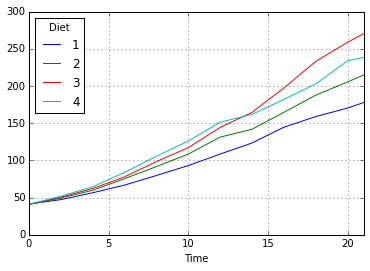

In [35]:
agg.unstack().plot()

## Hacking Bit! 

Play with a dataset! Grab a partner and try to learn pandas through a fun dataset. Search the web or if you need inspiration; this [blogpost](http://koaning.io/fun-datasets.html) might help.

### What next? 

I hope you enjoyed the open session. Drop me a line anytime https://twitter.com/fishnets88